In [1]:
fldr_path = "drive/MyDrive/flickr_8k"

In [2]:
#!unzip drive/MyDrive/flickr_8k/archive.zip -d drive/MyDrive/flickr_8k

## Analysing Data

In [3]:
import pandas as pd

In [4]:
### Checking captions

df = pd.read_csv(fldr_path + "/captions.txt")

In [5]:
df.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    40455 non-null  object
 1   caption  40455 non-null  object
dtypes: object(2)
memory usage: 632.2+ KB


In [7]:
### 40455 total entries. No null values.

In [8]:
### There are multiple prompts for a single image. Determining the unique number of data

unique = df["image"].unique()
len(unique)

8091

In [9]:
### There are 8091 total unique images

In [10]:
!pip install opencv-python

In [11]:
import cv2
from google.colab.patches import cv2_imshow

### Function to view image and the corresponding prompts.

def display_prompt_and_image(df,ind):


  image_file = df.loc[ind]["image"]

  ### Finding all prompts for that image

  df_prompts = df[df["image"]==image_file]
  prompts = df_prompts["caption"].values

  image = cv2.imread(fldr_path + "/Images/" + image_file)
  for prompt in prompts:
    print(prompt)
  print("\n\n")
  image = cv2.resize(image,(400,400))
  cv2_imshow(image)


A child in a pink dress is climbing up a set of stairs in an entry way .
A girl going into a wooden building .
A little girl climbing into a wooden playhouse .
A little girl climbing the stairs to her playhouse .
A little girl in a pink dress going into a wooden cabin .





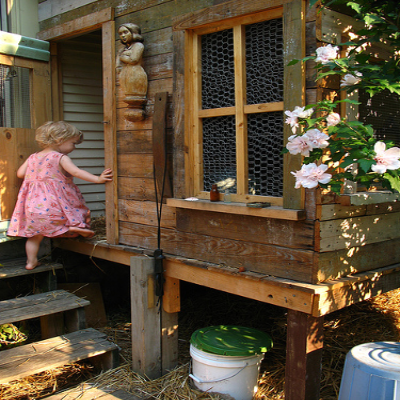

In [12]:
display_prompt_and_image(df,2)

A boy with a stick kneeling in front of a goalie net
A child in a red jacket playing street hockey guarding a goal .
A young kid playing the goalie in a hockey rink .
A young male kneeling in front of a hockey goal with a hockey stick in his right hand .
Hockey goalie boy in red jacket crouches by goal , with stick .





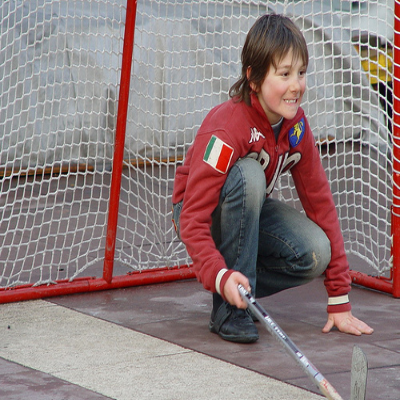

In [13]:
display_prompt_and_image(df,125)

## Preprocessing

In [14]:
### Cleaning data of punctuations and all lower case
import string

def clean_prompts(prompt : str):
  prompt = prompt.lower()
  prompt_cleaned = prompt.translate(str.maketrans("", "", string.punctuation))
  return prompt_cleaned

In [15]:
df['caption'] = df["caption"].apply(clean_prompts)

In [16]:
df.head()

,image,caption
0,1000268201_693b08cb0e.jpg,a child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,a girl going into a wooden building
2,1000268201_693b08cb0e.jpg,a little girl climbing into a wooden playhouse
3,1000268201_693b08cb0e.jpg,a little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,a little girl in a pink dress going into a woo...


In [17]:
### Adding <sos> and <eos> tags

In [18]:
def add_tags(prompt):

  return "<sos> "+prompt+" <eos>"

In [19]:
df['caption'] = df['caption'].apply(add_tags)

In [20]:
df.head()

,image,caption
0,1000268201_693b08cb0e.jpg,<sos> a child in a pink dress is climbing up a...
1,1000268201_693b08cb0e.jpg,<sos> a girl going into a wooden building <eos>
2,1000268201_693b08cb0e.jpg,<sos> a little girl climbing into a wooden pla...
3,1000268201_693b08cb0e.jpg,<sos> a little girl climbing the stairs to her...
4,1000268201_693b08cb0e.jpg,<sos> a little girl in a pink dress going into...


In [21]:
def splitting_captions(prompt : str):

  return prompt.split()

In [22]:
df['caption'] = df['caption'].apply(splitting_captions)

In [23]:
df.head()

,image,caption
0,1000268201_693b08cb0e.jpg,"[<sos>, a, child, in, a, pink, dress, is, clim..."
1,1000268201_693b08cb0e.jpg,"[<sos>, a, girl, going, into, a, wooden, build..."
2,1000268201_693b08cb0e.jpg,"[<sos>, a, little, girl, climbing, into, a, wo..."
3,1000268201_693b08cb0e.jpg,"[<sos>, a, little, girl, climbing, the, stairs..."
4,1000268201_693b08cb0e.jpg,"[<sos>, a, little, girl, in, a, pink, dress, g..."


In [24]:
### adding image_path for processing

In [25]:
df['image_path'] = fldr_path + "/Images/" +df['image']

In [26]:
df.head()

,image,caption,image_path
0,1000268201_693b08cb0e.jpg,"[<sos>, a, child, in, a, pink, dress, is, clim...",drive/MyDrive/flickr_8k/Images/1000268201_693b...
1,1000268201_693b08cb0e.jpg,"[<sos>, a, girl, going, into, a, wooden, build...",drive/MyDrive/flickr_8k/Images/1000268201_693b...
2,1000268201_693b08cb0e.jpg,"[<sos>, a, little, girl, climbing, into, a, wo...",drive/MyDrive/flickr_8k/Images/1000268201_693b...
3,1000268201_693b08cb0e.jpg,"[<sos>, a, little, girl, climbing, the, stairs...",drive/MyDrive/flickr_8k/Images/1000268201_693b...
4,1000268201_693b08cb0e.jpg,"[<sos>, a, little, girl, in, a, pink, dress, g...",drive/MyDrive/flickr_8k/Images/1000268201_693b...


## Analysing the vocabulary

In [27]:
vocab = df["caption"].values

In [28]:
vocab_list = [item for sublist in vocab for item in sublist]

In [29]:
unique_words = set(vocab_list)

In [30]:
len(unique_words)

8830

In [31]:
### Total 8830 words

In [32]:
from collections import Counter
vocab_count=Counter(vocab_list)

In [33]:
vocab_count.pop("<sos>")
vocab_count.pop("<eos>")


40455

In [34]:
top_20_words = vocab_count.most_common(20)

In [35]:
df_top_words = pd.DataFrame(top_20_words,columns=["word","count"])

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
plt.style.use("ggplot")

<Axes: xlabel='word', ylabel='count'>

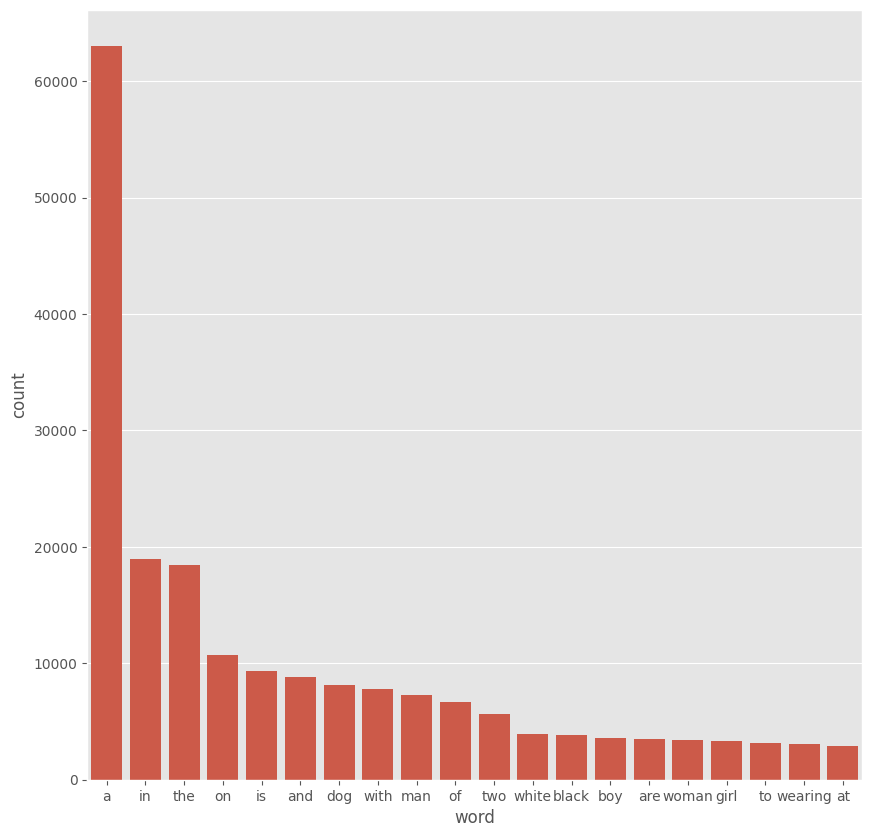

In [38]:
plt.figure(figsize=(10,10))
sns.barplot(x="word",y="count",data=df_top_words)

## Tokenization of Prompts

In [39]:
!pip install tensorflow

In [40]:
import tensorflow as tf

In [41]:
### Initializing tokenizer

top_word_count = 5000
filter_chars = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ '
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_word_count,
                                                  oov_token="<unk>",split = ",", filters= filter_chars)

In [42]:
tokenizer.fit_on_texts(vocab_list)

In [43]:
### tokenizer prompt and creation options

def tokenize(prompt):
  tokenized_inp = tokenizer.texts_to_sequences(prompt)
  tokenized_out = [item for sublist in tokenized_inp for item in sublist]
  return tokenized_out

In [44]:
## checking token id for the tags

import json

word2index = json.loads(tokenizer.get_config()['word_index'])
index2word = json.loads(tokenizer.get_config()['index_word'])

index2word = {int(key) : value for key,value in index2word.items()}

print(f"<sos> is {word2index['<sos>']}")
print(f"<eos> is {word2index['<eos>']}")
print(f"<unk> is {word2index['<unk>']}")

<sos> is 3
<eos> is 4
<unk> is 1


In [45]:
### Adjusting padding

In [46]:
## Checking Max Length for padding

max_sequence_length = max(len(t) for t in vocab)
print(f'Max Length: {max_sequence_length}')

Max Length: 38


In [47]:
## Adding post padding

def add_padding(prompt):
  return tf.keras.preprocessing.sequence.pad_sequences([prompt],maxlen=max_sequence_length,padding="post")[0]

In [48]:
df["tokenized_input"] = df["caption"].apply(tokenize)

In [49]:
df["tokenized_input_padded"] = df["tokenized_input"].apply(add_padding)

In [50]:
df.loc[0]['tokenized_input']

[3, 2, 43, 5, 2, 91, 171, 8, 120, 54, 2, 396, 13, 393, 5, 29, 1, 694, 4]

In [51]:
## Checking tokenized output. 0 is padding

df.loc[0]['tokenized_input_padded']

array([  3,   2,  43,   5,   2,  91, 171,   8, 120,  54,   2, 396,  13,
       393,   5,  29,   1, 694,   4,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
      dtype=int32)

In [52]:
df.head()

,image,caption,image_path,tokenized_input,tokenized_input_padded
0,1000268201_693b08cb0e.jpg,"[<sos>, a, child, in, a, pink, dress, is, clim...",drive/MyDrive/flickr_8k/Images/1000268201_693b...,"[3, 2, 43, 5, 2, 91, 171, 8, 120, 54, 2, 396, ...","[3, 2, 43, 5, 2, 91, 171, 8, 120, 54, 2, 396, ..."
1,1000268201_693b08cb0e.jpg,"[<sos>, a, girl, going, into, a, wooden, build...",drive/MyDrive/flickr_8k/Images/1000268201_693b...,"[3, 2, 20, 315, 65, 2, 195, 118, 4]","[3, 2, 20, 315, 65, 2, 195, 118, 4, 0, 0, 0, 0..."
2,1000268201_693b08cb0e.jpg,"[<sos>, a, little, girl, climbing, into, a, wo...",drive/MyDrive/flickr_8k/Images/1000268201_693b...,"[3, 2, 41, 20, 120, 65, 2, 195, 2432, 4]","[3, 2, 41, 20, 120, 65, 2, 195, 2432, 4, 0, 0,..."
3,1000268201_693b08cb0e.jpg,"[<sos>, a, little, girl, climbing, the, stairs...",drive/MyDrive/flickr_8k/Images/1000268201_693b...,"[3, 2, 41, 20, 120, 6, 393, 21, 61, 2432, 4]","[3, 2, 41, 20, 120, 6, 393, 21, 61, 2432, 4, 0..."
4,1000268201_693b08cb0e.jpg,"[<sos>, a, little, girl, in, a, pink, dress, g...",drive/MyDrive/flickr_8k/Images/1000268201_693b...,"[3, 2, 41, 20, 5, 2, 91, 171, 315, 65, 2, 195,...","[3, 2, 41, 20, 5, 2, 91, 171, 315, 65, 2, 195,..."


### Preprocessing Images to create features

In [53]:
### We will be using ImageNet trained Inception V3 network in order to extract features from images:

### so image_shape: (299, 299)
### Images are in jpeg fomat. Since its RGB images we need to decode and perform a basic preprocessing required for inception networks


def preprocess_images_function(image_path):
  shape = (299, 299)
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image)
  image = tf.image.resize(image, shape)
  image = tf.keras.applications.inception_v3.preprocess_input(image)

  return image, image_path

In [54]:
image_preprocessed_1 = preprocess_images_function(df.loc[0]['image_path'])

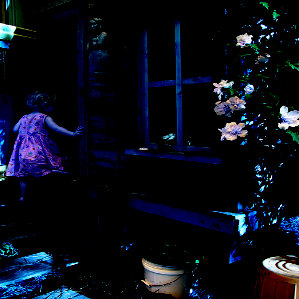

In [55]:
cv2_imshow(image_preprocessed_1[0].numpy()*255)

In [56]:
image_preprocessed_100 = preprocess_images_function(df.loc[100]['image_path'])

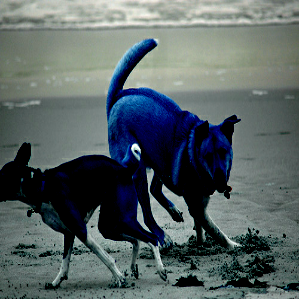

In [57]:
cv2_imshow(image_preprocessed_100[0].numpy()*255)

In [58]:
image_preprocessed_100[0].shape   # checking shape

TensorShape([299, 299, 3])

## Defining Feature Extractor Inception Model

In [59]:
### Loading Inception v3 model as feature extractor

### Using keras model API

def get_inception_model():

  model = tf.keras.applications.InceptionV3(include_top=False)
  input = model.input
  hidden = model.layers[-1].output  ### removing classification layer

  return tf.keras.Model(inputs = input, outputs =hidden) ## Functional API

In [60]:
feature_extractor_model = get_inception_model()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [61]:
feature_extractor_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, None, None, 32) │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, None, None, 32) │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, None, None, 32) │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, None, None, 32) │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, None, None, 32) │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, None, None, 32) │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, None, None, 64) │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, None, None, 64) │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, None, None, 64) │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, None, None, 64) │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, None, None, 80) │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, None, None, 80) │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, None, None, 80) │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, None, None,     │        138,240 │ activation_3[0][0]     │
│                           │ 192)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, None, None,     │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │ 192)                   │                │                        │
├──────────────────────

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [62]:
### Creating dataset from images

In [63]:
df.head()

,image,caption,image_path,tokenized_input,tokenized_input_padded
0,1000268201_693b08cb0e.jpg,"[<sos>, a, child, in, a, pink, dress, is, clim...",drive/MyDrive/flickr_8k/Images/1000268201_693b...,"[3, 2, 43, 5, 2, 91, 171, 8, 120, 54, 2, 396, ...","[3, 2, 43, 5, 2, 91, 171, 8, 120, 54, 2, 396, ..."
1,1000268201_693b08cb0e.jpg,"[<sos>, a, girl, going, into, a, wooden, build...",drive/MyDrive/flickr_8k/Images/1000268201_693b...,"[3, 2, 20, 315, 65, 2, 195, 118, 4]","[3, 2, 20, 315, 65, 2, 195, 118, 4, 0, 0, 0, 0..."
2,1000268201_693b08cb0e.jpg,"[<sos>, a, little, girl, climbing, into, a, wo...",drive/MyDrive/flickr_8k/Images/1000268201_693b...,"[3, 2, 41, 20, 120, 65, 2, 195, 2432, 4]","[3, 2, 41, 20, 120, 65, 2, 195, 2432, 4, 0, 0,..."
3,1000268201_693b08cb0e.jpg,"[<sos>, a, little, girl, climbing, the, stairs...",drive/MyDrive/flickr_8k/Images/1000268201_693b...,"[3, 2, 41, 20, 120, 6, 393, 21, 61, 2432, 4]","[3, 2, 41, 20, 120, 6, 393, 21, 61, 2432, 4, 0..."
4,1000268201_693b08cb0e.jpg,"[<sos>, a, little, girl, in, a, pink, dress, g...",drive/MyDrive/flickr_8k/Images/1000268201_693b...,"[3, 2, 41, 20, 5, 2, 91, 171, 315, 65, 2, 195,...","[3, 2, 41, 20, 5, 2, 91, 171, 315, 65, 2, 195,..."


### Creating Feature Set from Images

In [64]:
images_to_be_processed = df["image_path"].tolist()

In [65]:
images_to_be_processed = sorted(set(images_to_be_processed)) ### Making sure each image is processed only once.

In [66]:
### Creating data generator for the preproceesing model in batch of dimension (299, 299 , 3)

### Each with 64 batch -> total 8091/64 = 127

image_dataset = tf.data.Dataset.from_tensor_slices(images_to_be_processed)
image_dataset = image_dataset.map(preprocess_images_function, num_parallel_calls=tf.data.experimental.AUTOTUNE) \
                .batch(64)

In [67]:
image_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [68]:
test_batch,_ =next(iter(image_dataset))

In [69]:
test_batch.shape

TensorShape([64, 299, 299, 3])

In [70]:
from tqdm import tqdm

In [71]:
df.iloc[0]["image"]

'1000268201_693b08cb0e.jpg'

In [72]:
import numpy as np


In [73]:
### Extracting features from images

### Storing the feature files under featurtes
import os

image_feature_extracted = {}
feature_path = "/features/"

if os.path.exists(feature_path) == False:
  os.mkdir(feature_path)     ### To pre-compute and store features extracted from images

if tf.device('/CPU:0'):
  for image_batch,image_path_batch in tqdm(image_dataset):
    batch_features = feature_extractor_model(image_batch)     ####  Dimension: (batch x (8 x 8) x 2048)
    batch_features = tf.reshape(batch_features,
                                (batch_features.shape[0], -1, batch_features.shape[3])) #### Dimension (batch x 64 x 2048) -> flattening

    for image_path, batch_feature in zip(image_path_batch.numpy(), batch_features):
      image_feature_extracted[image_path.decode("utf-8")] = batch_feature.numpy()
      file_ = image_path.decode("utf-8").split("/")[-1].split(".")[0]
      np.save(feature_path+file_, batch_feature.numpy()) #### Storing each feature data under the same name as the image name


100%|██████████| 127/127 [03:52<00:00,  1.83s/it]


### Creating train and test data

In [74]:
### Splitting data

images_to_be_processed = df["image_path"].tolist()
captions = df["tokenized_input_padded"].tolist()

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
### Splitting data into train and test

image_train, image_test , caption_train, caption_test = train_test_split(images_to_be_processed,captions,test_size=0.2,random_state=42)

In [77]:
### Lengths:

print("Train: ",len(image_train))
print("Test: ",len(image_test))

Train:  32364
Test:  8091


In [78]:
### Checking data

In [79]:
### adding pad token to the tokenizer for recognition

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

In [80]:
## Demoing test case

print(caption_test[0])
print(" ".join(tokenizer.index_word[i] for i in caption_test[0]))

[   3    2   56 1675  585    8 4723    2  228  125    2 1470    4    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]
<sos> a large wild cat is pursuing a horse across a meadow <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>


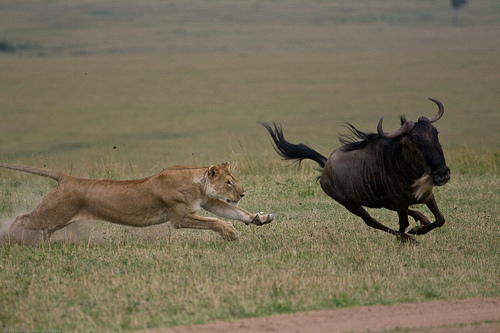

In [81]:
cv2_imshow(cv2.imread(image_test[0]))

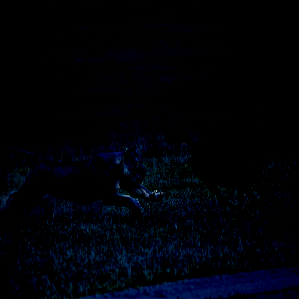

In [82]:
cv2_imshow((preprocess_images_function(image_test[0]))[0].numpy()*255)

In [83]:
feature_path = "/features/"
file_ = images_to_be_processed[0].split("/")[-1].split(".")[0]
feature_file = feature_path+file_+".npy"

In [84]:
features = np.load(feature_file)

In [85]:
### Loading feature file : shape (64 x 2048) -> final layer of inception -> dense layer with 2048 nodes

In [86]:
features.shape

(64, 2048)

### Creating Data Generator

In [87]:
## Mapper function to return a tuple for features and caption for the image
## Used in data generator to provide train instances


def map_caption_to_features(image_path, caption):

  file_ = image_path.numpy().decode("utf-8").split("/")[-1].split(".")[0]
  feature_file = feature_path+file_+".npy"
  features = np.load(feature_file)

  return features, caption    ### returns tuple (feature, captions)

In [88]:
### Data generator function to generate tuple for map functions to shuffle and return batch

def data_generator(image_path,caption, batch_size=32, buffer_size=1000):
    dataset = tf.data.Dataset.from_tensor_slices((image_path, caption))   ### Reading data

    # Use map to load the numpy files in parallel
    dataset = dataset.map(lambda item1, item2: tf.py_function(map_caption_to_features, [item1, item2], [tf.float32, tf.int32]), num_parallel_calls=tf.data.experimental.AUTOTUNE)

    #### creating data set

    ### Prefetching data to enable parallelization
    ### batch size 32

    dataset = dataset.shuffle(buffer_size) \
    .batch(batch_size, drop_remainder= True) \
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

    return dataset

In [89]:
#### Creating training and test data generator

train_dataset=data_generator(image_train,caption_train,batch_size=64)
test_dataset=data_generator(image_test,caption_test, batch_size=64)

In [90]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  ### 32 batch size (32 x 64 x 2048)
print(sample_cap_batch.shape)  #### (32 x 38)

(64, 64, 2048)
(64, 38)


## Modelling

### Approach 1

In [91]:
### We need an embedding layer

In [92]:
BATCH_SIZE = 64
embedding_dim = 256  ### Dimension of embedding
vocab_size = 5001 # 5000 words + <unk>
train_num_steps = len(image_train) // BATCH_SIZE
test_num_steps = len(image_test) // BATCH_SIZE
model_units = 512   ### To match the concatenated dimension of the context and the input vector

In [93]:
features_shape = features.shape[1] ##### The shape of each feature: 2048 (final layer dimension)
attention_features_shape = features.shape[0]

#### Encoder

In [94]:
from tensorflow.keras.models import Model

In [95]:
### Model encoder:

with tf.device('/GPU:0'):
  class Encoder(Model):
    def __init__(self,embed_dim):
          super(Encoder, self).__init__()
          self.dense = tf.keras.layers.Dense(embed_dim) ### Dense layers to 256 neurons
          self.dropout = tf.keras.layers.Dropout(0.5)

    def call(self, features):
          features =  self.dense(features)  ### (batch_size x 64 x 2048) -> (batch_size x 64 x 256) -> 256 to match the embedding layer output -> concatenation possible
          features = tf.nn.relu(features)

          return features

In [96]:
with tf.device('/GPU:0'):
  encoder=Encoder(embedding_dim)

#### Attention model

In [97]:
with tf.device('/GPU:0'):

  ### Using additive attention : V * (W1 * C + W2 * H)T

  class Attention(Model):
    def __init__(self, units):
          super(Attention, self).__init__()
          self.W1 = tf.keras.layers.Dense(units) ### Weight matrix for key vector
          self.W2 = tf.keras.layers.Dense(units) ### Weight matrix for value vector
          self.V = tf.keras.layers.Dense(1) ### Final transformation
          self.units = units

    def call(self, features, hidden):
          hidden_with_time_axis = tf.expand_dims(hidden, 1)  ### (batch_size, 256) -> (batch_size, 1, 256) -> expansion for dimension match
          score = tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis)) ### additive attention
          attention_weights = tf.nn.softmax(self.V(score), axis=1)  ### softmax to bring probability sum to 1
          context_vector = attention_weights * features   ### Attention to regulate the focus of the decoder to proper features
          context_vector = tf.reduce_sum(context_vector, axis=1)
          return context_vector, attention_weights

#### Decoder

In [98]:
with tf.device('/GPU:0'):
  class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
          super(Decoder, self).__init__()
          self.units = units
          self.attention = Attention(self.units) ### Attention
          self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim) ### Embedding layer for the input
          self.gru = tf.keras.layers.GRU(self.units, return_sequences=True, return_state=True, recurrent_initializer='glorot_uniform', reset_after=False)
          self.dropout = tf.keras.layers.Dropout(0.5)
          self.fc1 = tf.keras.layers.Dense(self.units)
          self.fc2 = tf.keras.layers.Dense(vocab_size) ### Final layer for softmax for each word probability


    def call(self, x, features, hidden):
          context_vector, attention_weights = self.attention(features, hidden)
          embed = self.embed(x)   ### (batch_size, 1, 256) from embedding vector
          embed = self.dropout(embed)
          embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1)  ### (batch_size, 64, 256) + (batch_size, 1, 256) -> (batch_size, 65, 512)
          embed = self.dropout(embed)
          output, state = self.gru(embed)
          x = self.fc1(output)      ##### fully connected layer 1
          x = tf.reshape(x, (-1, x.shape[2]))
          x = self.fc2(x)
          return x, state, attention_weights

    def init_state(self, batch_size):
          return tf.zeros((batch_size, self.units))



In [99]:
with tf.device('/GPU:0'):
  decoder = Decoder(embedding_dim, model_units, vocab_size)

In [100]:
### Sample run

features = encoder(sample_img_batch)
hidden = decoder.init_state(batch_size=sample_img_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<sos>']] * BATCH_SIZE, 1)

pred, state, attention = decoder(dec_input, features, hidden)
print(pred.shape)
print(features.shape)
print(state.shape)
print(attention.shape)

(64, 5001)
(64, 64, 256)
(64, 512)
(64, 64, 1)


### Model Training

In [101]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) ## adam optimizer
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')   ### Probablity

In [102]:
def loss(y_actual, y_pred):
    mask = tf.math.logical_not(tf.math.equal(y_actual, 0))    #### Detecting paddings by detecting where padding was used to exclude them from loss functions
    loss_val = loss_func(y_actual, y_pred)

    mask = tf.cast(mask, dtype=loss_val.dtype)
    loss_val *= mask    ### Adding mask to make loss 0 for paddings

    return tf.reduce_mean(loss_val)

In [103]:
### Training functions

@tf.function
def train(feature, caption):

  loss_value = 0
  hidden = decoder.init_state(batch_size= caption.shape[0])
  dec_input = tf.expand_dims([tokenizer.word_index['<sos>']] * caption.shape[0], 1)   ### First input -> sos
  with tf.GradientTape() as tape:
      features = encoder(feature)
      for i in range(1, caption.shape[1]):
          pred, hidden, _ = decoder(dec_input, features, hidden)
          dec_input = tf.expand_dims(caption[:, i], 1)  ## Teacher forcing -> sending data from target data
          loss_value += loss(caption[:, i], pred)
      avg_loss = (loss_value / int(caption.shape[1]))   ## Calculating loss
      trainable_variables = encoder.trainable_variables + decoder.trainable_variables   #### noting all trainable variables
      gradients = tape.gradient(loss_value, trainable_variables)
      optimizer.apply_gradients(zip(gradients, trainable_variables)) ## Applying the gradients to the corresponding weights

  return loss_value, avg_loss

In [104]:
### Test loss calculation

@tf.function
def test(feature, caption):

  loss_value = 0
  hidden = decoder.init_state(batch_size= caption.shape[0])
  dec_input = tf.expand_dims([tokenizer.word_index['<sos>']] * caption.shape[0], 1)

  with tf.GradientTape() as tape:
    features = encoder(feature)
    for i in range(1, caption.shape[1]):
        pred, hidden, _ = decoder(dec_input, features, hidden)
        loss_value += loss(caption[:, i], pred)
        prediction = tf.argmax(pred,1)
        dec_input = tf.expand_dims(prediction, 1)   ### No teacher forcing -> predictions only sent
    avg_loss = (loss_value / int(caption.shape[1]))

  return loss_value, avg_loss

In [105]:
with tf.device('/GPU:0'):
  def total_test_loss(test_dataset):
      total_loss = 0

      for (batch, (img_tensor, target)) in enumerate(test_dataset):
          batch_loss, t_loss = test(img_tensor, target)
          total_loss += t_loss.numpy()
      avg_test_loss=total_loss/test_num_steps     ### Average loss

      return avg_test_loss

In [106]:
checkpoint_path ="/checkpoints_new/train_attn"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [107]:
import gc

In [108]:
import sys
def sizeof_fmt(num, suffix='B'):
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:20]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                            df: 27.1 MiB
                    vocab_list:  4.0 MiB
                  unique_words: 512.2 KiB
        images_to_be_processed: 316.1 KiB
                      captions: 316.1 KiB
                    index2word: 288.1 KiB
                   image_train: 270.8 KiB
                 caption_train: 270.8 KiB
                   vocab_count: 202.8 KiB
                    word2index: 202.8 KiB
       image_feature_extracted: 202.8 KiB
                    image_test: 65.6 KiB
                  caption_test: 65.6 KiB
                        unique: 63.3 KiB
                            __:  3.6 KiB
                           _52:  3.6 KiB
                           _63:  3.6 KiB
                           _26:  2.0 KiB
                       Counter:  1.6 KiB
                          tqdm:  1.6 KiB


In [109]:
del df
del vocab_list
del unique_words

In [110]:
gc.collect()

22

In [111]:
import psutil
process = psutil.Process(os.getpid())
process.memory_info()

pmem(rss=8278376448, vms=40879902720, shared=1796960256, text=2772992, lib=0, data=9078734848, dirty=0)

In [112]:
start_epoch = 0
ckpt.restore(ckpt_manager.latest_checkpoint)
if ckpt_manager.latest_checkpoint:            ### Checkpoint to store model.
  start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [113]:
tf.executing_eagerly()

True

In [114]:
# import time
# start_time = time.time()
# if tf.device('/GPU:0'):
#       total_loss = 0
#       for (batch, (img_tensor, target)) in enumerate(train_dataset):
#           batch_loss, t_loss = train(img_tensor, target)
#           total_loss += t_loss
#           if batch % 100 == 0:
#               print (f"{batch} done")
# end_time = time.time()
# print("Time taken: {:.2f}".format(end_time-start_time))

### Model Training

In [115]:
tf.config.run_functions_eagerly(True)

loss_history = []
test_loss_history = []
epochs=15

max_test_loss = 100

if tf.device('/GPU:0'):
  for epoch in tqdm(range(0, epochs)):
      total_loss = 0
      for (batch, (img_tensor, target)) in enumerate(train_dataset):      #### training

          if batch % 100 == 0:
              print (f"{batch} done")

          batch_loss, t_loss = train(img_tensor, target)
          total_loss += t_loss

      avg_train_loss=total_loss / train_num_steps


      loss_history.append(avg_train_loss)

      test_loss = total_test_loss(test_dataset)
      test_loss_history.append(test_loss)

      print ('Epoch {} Loss {:.6f}'.format(epoch + 1, avg_train_loss))
      print ('Epoch {} Test Loss {:.6f}'.format(epoch + 1, test_loss))

      if test_loss < max_test_loss:
          print("Test loss decreased from {:.6f} to {:.6f}".format(max_test_loss, test_loss))
          max_test_loss = test_loss
          ckpt_manager.save()

  0%|          | 0/15 [00:00<?, ?it/s]

0 done
100 done
200 done
300 done
400 done
500 done
Epoch 1 Loss 1.265836
Epoch 1 Test Loss 1.938329
Test loss decreased from 100.000000 to 1.938329


  7%|▋         | 1/15 [19:00<4:26:08, 1140.60s/it]

0 done
100 done
200 done
300 done
400 done
500 done


 13%|█▎        | 2/15 [38:06<4:07:47, 1143.62s/it]

Epoch 2 Loss 0.994562
Epoch 2 Test Loss 1.994195
0 done
100 done
200 done
300 done
400 done
500 done


 20%|██        | 3/15 [57:11<3:48:51, 1144.32s/it]

Epoch 3 Loss 0.906529
Epoch 3 Test Loss 1.908879
Test loss decreased from 1.938329 to 1.908879
0 done
100 done
200 done
300 done
400 done
500 done


 27%|██▋       | 4/15 [1:16:15<3:29:45, 1144.11s/it]

Epoch 4 Loss 0.843645
Epoch 4 Test Loss 1.961547
0 done
100 done
200 done
300 done
400 done
500 done


 33%|███▎      | 5/15 [1:35:21<3:10:49, 1144.91s/it]

Epoch 5 Loss 0.791813
Epoch 5 Test Loss 1.981375
0 done
100 done
200 done
300 done
400 done
500 done


 40%|████      | 6/15 [1:54:31<2:51:58, 1146.48s/it]

Epoch 6 Loss 0.746069
Epoch 6 Test Loss 2.001424
0 done
100 done
200 done
300 done
400 done
500 done


 47%|████▋     | 7/15 [2:13:41<2:33:02, 1147.79s/it]

Epoch 7 Loss 0.702782
Epoch 7 Test Loss 2.100633
0 done
100 done
200 done
300 done
400 done
500 done


 53%|█████▎    | 8/15 [2:33:00<2:14:19, 1151.42s/it]

Epoch 8 Loss 0.664588
Epoch 8 Test Loss 2.093418
0 done
100 done
200 done
300 done
400 done
500 done


 60%|██████    | 9/15 [2:52:25<1:55:33, 1155.52s/it]

Epoch 9 Loss 0.627977
Epoch 9 Test Loss 2.116794
0 done
100 done
200 done
300 done
400 done
500 done


 67%|██████▋   | 10/15 [3:11:48<1:36:29, 1157.95s/it]

Epoch 10 Loss 0.594193
Epoch 10 Test Loss 2.221512
0 done
100 done
200 done
300 done
400 done
500 done


 73%|███████▎  | 11/15 [3:31:13<1:17:20, 1160.12s/it]

Epoch 11 Loss 0.563749
Epoch 11 Test Loss 2.264036
0 done
100 done
200 done
300 done
400 done
500 done


 80%|████████  | 12/15 [3:50:38<58:04, 1161.54s/it]  

Epoch 12 Loss 0.534981
Epoch 12 Test Loss 2.336498
0 done
100 done
200 done
300 done
400 done
500 done


 87%|████████▋ | 13/15 [4:10:02<38:44, 1162.26s/it]

Epoch 13 Loss 0.507246
Epoch 13 Test Loss 2.402629
0 done
100 done
200 done
300 done
400 done
500 done


 93%|█████████▎| 14/15 [4:29:32<19:24, 1164.52s/it]

Epoch 14 Loss 0.483126
Epoch 14 Test Loss 2.464823
0 done
100 done
200 done
300 done
400 done
500 done


100%|██████████| 15/15 [4:48:53<00:00, 1155.58s/it]

Epoch 15 Loss 0.459569
Epoch 15 Test Loss 2.600352


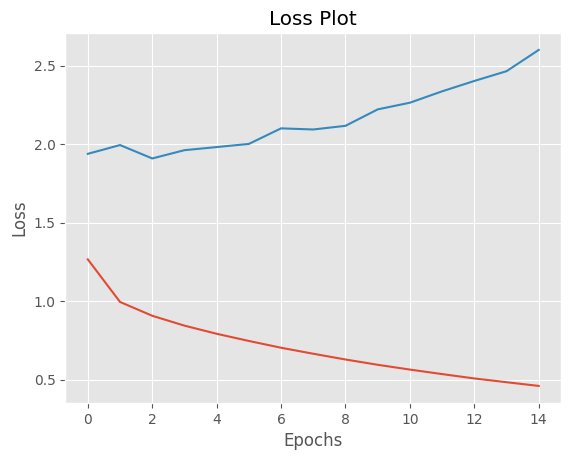

In [116]:
plt.plot(loss_history)
plt.plot(test_loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

## Evaluation and Caption Generation

In [117]:
import pickle

with open('/checkpoints_new/tokenizer.pkl',"wb") as f:
    pickle.dump(tokenizer,f)

In [120]:
!zip -r /checkpoints_new.zip /checkpoints_new

  adding: checkpoints_new/ (stored 0%)
  adding: checkpoints_new/tokenizer.pkl (deflated 51%)
  adding: checkpoints_new/train_attn/ (stored 0%)
  adding: checkpoints_new/train_attn/ckpt-2.data-00000-of-00001 (deflated 17%)
  adding: checkpoints_new/train_attn/ckpt-2.index (deflated 66%)
  adding: checkpoints_new/train_attn/ckpt-1.index (deflated 66%)
  adding: checkpoints_new/train_attn/ckpt-1.data-00000-of-00001 (deflated 17%)
  adding: checkpoints_new/train_attn/checkpoint (deflated 54%)


In [121]:
from google.colab import files
files.download("/checkpoints_new.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Greedy Search

In [122]:
max_length = 38

In [123]:
def greedy_evaluate(image):     ### Selecting the word with the maximum possibility
    attention_plot = np.zeros((max_length, attention_features_shape))
    hidden = decoder.init_state(batch_size=1)

    input = tf.expand_dims(preprocess_images_function(image)[0], 0)
    features = feature_extractor_model(input)
    features = tf.reshape(features, (features.shape[0], -1, features.shape[3]))
    encoded_features = encoder(features)


    dec_input = tf.expand_dims([tokenizer.word_index['<sos>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, encoded_features, hidden)
        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
        predicted_id = tf.argmax(predictions[0]).numpy()    ### Selecting the max probable word
        result.append(tokenizer.index_word[predicted_id])   ### adding the word to the answer

        if tokenizer.index_word[predicted_id] == '<eos>':     ### Stop at eos
            return result, attention_plot, predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot, predictions

### Beam Search

In [124]:
def beam_evaluate(image, beam_index = 3):  ## Beam_index is beam width
    start = [tokenizer.word_index['<sos>']]
    result = [[start, 0.0]]

    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(preprocess_images_function(image)[0], 0)
    img_tensor_val = feature_extractor_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<sos>']], 0)

    while len(result[0][0]) < max_length:     ### Till max length
        i=0
        temp = []
        for s in result:
            predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
            attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
            i=i+1
            word_preds = np.argsort(predictions[0])[-beam_index:]

            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)

                prob += np.log(predictions[0][w])

                temp.append([next_cap, prob])
        result = temp
        result = sorted(result, reverse=False, key=lambda l: l[1])
        result = result[-beam_index:]


        predicted_id = result[-1]
        pred_list = predicted_id[0]

        prd_id = pred_list[-1]
        if(prd_id!=3):
            dec_input = tf.expand_dims([prd_id], 0)
        else:
            break


    result2 = result[-1][0]

    intermediate_caption = [tokenizer.index_word[i] for i in result2]
    final_caption = []
    for i in intermediate_caption:
        if i != '<eos>':
            final_caption.append(i)

        else:
            break

    attention_plot = attention_plot[:len(result), :]
    final_caption = ' '.join(final_caption[1:])
    return final_caption

In [125]:
from nltk.translate.bleu_score import sentence_bleu

### Testing Performance

In [126]:
def filtering_text(text):
  filter = ['<sos>', '<eos>', '<unk>']
  temp= text.split()
  [temp.remove(j) for k in filter for j in temp if k==j]
  text=' '.join(temp)
  return text

In [127]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))

    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))

        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)

        img=ax.imshow(temp_img)

        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [128]:
from nltk.translate.bleu_score import sentence_bleu
from PIL import Image
def testing_model(img_test):
    rid = np.random.randint(0, len(img_test))
    test_image = img_test[rid]
    #test_image = './images/413231421_43833a11f5.jpg'
    #real_caption = '<start> black dog is digging in the snow <end>'

    real_caption = ' '.join([tokenizer.index_word[i] for i in caption_test[rid] if i not in [0]])
    result, attention_plot,pred_test = greedy_evaluate(test_image)


    real_caption=filtering_text(real_caption)


    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()

    score = sentence_bleu(reference, candidate, weights=(0.25,0.5,0.25,0))
    print(f"BELU score: {score*100}")

    print ('Real Caption:', real_caption)
    print ('Prediction Caption:', pred_caption)
    plot_attmap(result, attention_plot, test_image)


    Image.open(test_image)

In [129]:
from PIL import Image

def predict(test_image):
    openImg = test_image
    print(test_image)
    result, attention_plot,pred_test = greedy_evaluate(test_image)
    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    candidate = pred_caption.split()

    print ('Prediction Caption:', pred_caption)
    print ('')

    im = Image.open(openImg)
    width, height = im.size
    print(width,height)
    div=3
    if width > 3000:
        div=10
    im = im.resize((width//div, height//div))

    return im

drive/MyDrive/flickr_8k/Images/270263570_3160f360d3.jpg
Prediction Caption: two brown dogs wearing collars are wrestling

500 461


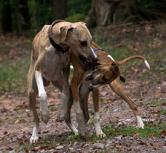

In [130]:
predict(image_test[1])

drive/MyDrive/flickr_8k/Images/3485816074_363cab4bff.jpg
Prediction Caption: a girl in a red and yellow and yellow is falling off the opposing team

500 333


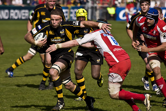

In [131]:
predict(image_test[10])

BELU score: 21.250418296472407
Real Caption: an adult is pulling a child out of a ball pit
Prediction Caption: a group of kids play on a ball pit


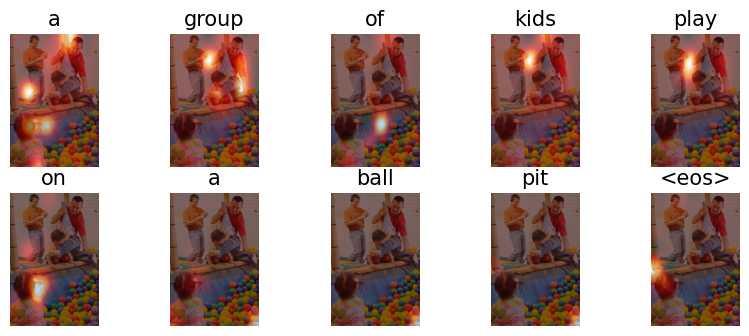

In [135]:
test_image = testing_model(image_test)


BELU score: 1.4875195904069663e-229
Real Caption: young blonde boy on swing set in park
Prediction Caption: a young boy is happily swinging in a swing


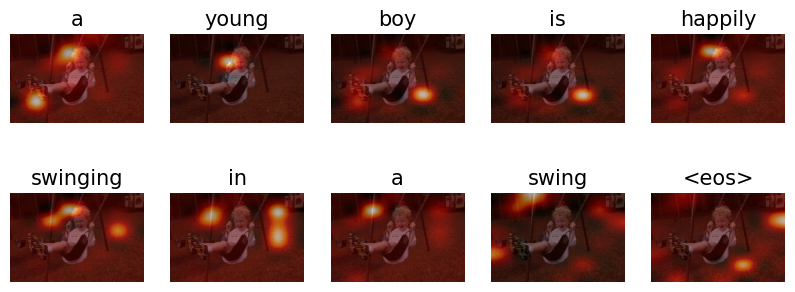

In [137]:
test_image = testing_model(image_test)


BELU score: 1.0862123595369836e-76
Real Caption: man and child in yellow kayak
Prediction Caption: a man and a young boy and a yellow life jacket and a life jacket and a life jacket and a life jacket and a life jacket and a life jacket and a life jacket and a


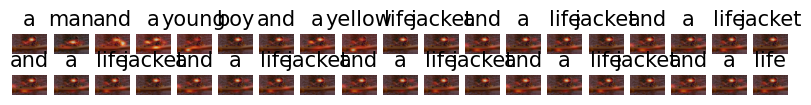

In [144]:
test_image = testing_model(image_test)


In [146]:
from PIL import Image

def predict_beam(test_image):
    openImg = test_image
    print(test_image)
    result = beam_evaluate(test_image)
    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    candidate = pred_caption.split()

    print ('Prediction Caption:', pred_caption)
    print ('')

    im = Image.open(openImg)
    width, height = im.size
    print(width,height)
    div=3
    if width > 3000:
        div=10
    im = im.resize((width//div, height//div))

    return im

drive/MyDrive/flickr_8k/Images/270263570_3160f360d3.jpg
Prediction Caption: t w o   b r o w n   d o g s   w h i t e   a n d   w h i t e   b r o w

500 461


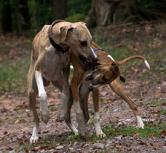

In [147]:
predict_beam(image_test[1])

drive/MyDrive/flickr_8k/Images/2054869561_ff723e9eab.jpg
Prediction Caption: a   d o g   f o l l o w

500 333


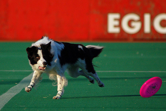

In [148]:
predict_beam(image_test[100])

In [ ]:
### DONE